# Ising Model data analysis

In [1]:
# Usual imports
import matplotlib.pyplot as plt               # for plotting
import numpy as np                            # matrix handling

from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
from matplotlib import animation, rc


In [2]:
! gfortran ./ising.f03 -o isi -llapack

In [3]:
def plt_ev_lambdas(N,nlam,k):
    folder = 'N'+str(N)+'l'+str(nlam)
    ! echo $N $nlam $folder | ./isi >/dev/null
    
    eivals = np.genfromtxt('./data/lambdas/'+folder+'/eigenvalue', delimiter='')
    
    plt.title('Energy values for N='+str(N))
    plt.xlabel(r'$\lambda$')
    plt.ylabel('E')
    
    x = np.linspace(0,3,nlam)
    
    for i in range(k):
        plt.plot(x,eivals[:-1,i],label='k='+str(i))
            
    plt.legend()
    plt.yticks(rotation=90)
    plt.grid(True)

def plt_ev_Ns(Ns,nlam,k):
    plt.title('Energy level: '+str(k))
    plt.xlabel(r'$\lambda$')
    plt.ylabel('E')
    x = np.linspace(0,3,nlam)
    
    plt.yticks(rotation=90)
    plt.grid(True)
    
    for N in Ns:
        folder = 'N'+str(N)+'l'+str(nlam)
        ! echo $N $nlam $folder | ./isi >/dev/null
    
        eivals = np.genfromtxt('./data/lambdas/'+folder+'/eigenvalue', delimiter='')
    
        plt.plot(x,eivals[:-1,k],label='N='+str(N))

    plt.legend()
    
def plt_ev_MFA(nlam):
    plt.title('Ground state Mean Field Approximation')
    plt.xlabel(r'$\lambda$')
    plt.ylabel('E')
    x = np.linspace(0,3,nlam)
    
    plt.yticks(rotation=90)
    plt.grid(True)
    
    xx = 0
    y = []
    y1 = []
    y2 = []
    while(x[xx]<=2):
        y.append( -1 - (x[xx]**2)/4 )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    while(xx < nlam):
        y.append( -x[xx] )
        y1.append( -1 - (x[xx]**2)/4 )
        y2.append( -x[xx] )
        xx = xx + 1
    plt.plot(x,y,label='MFA',color='black')
    plt.plot(x,y1,label='linear',ls='--',color='crimson',alpha=0.7)
    plt.plot(x,y2,label='quadratic',ls='--',color='blue',alpha=0.7)
    plt.plot(2, -2, marker='+',color='crimson', ms=10,mew=2)
    plt.ylim(-3,-0.8)
    plt.legend()

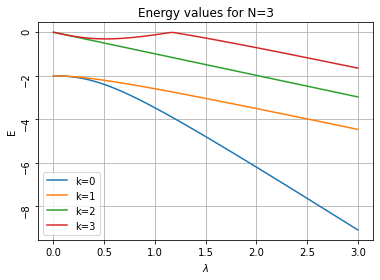

In [4]:
plt_ev_lambdas(3,100,4)
plt.savefig('./imgs/N3ks', format='svg')

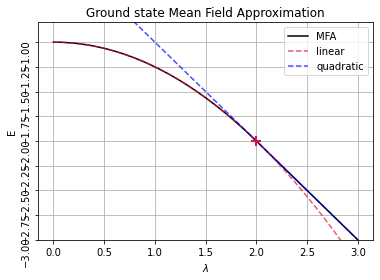

In [5]:
plt_ev_MFA(35)
plt.savefig('./imgs/MFA', format='svg')

In [6]:
x = np.linspace(0,3,35)
xx = 0
mfa = []
while(x[xx]<=2):
    mfa.append( -1 - (x[xx]**2)/4 )
    xx = xx + 1
while(xx < 35):
    mfa.append( -x[xx] )
    xx = xx + 1

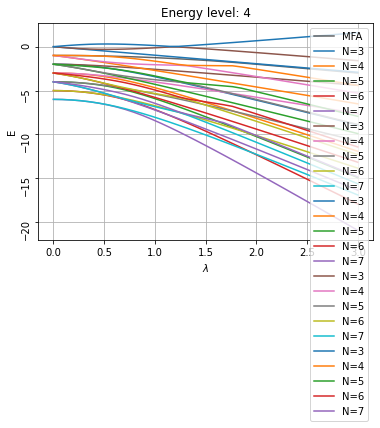

In [7]:
plt.plot(x,mfa,color='black',label='MFA',alpha=0.6)
for en in range(5):
    Ns = np.arange(3,8)
    plt_ev_Ns(Ns,35,en)
    plt.savefig('./imgs/Ns_lvl'+str(en), format='svg')
    plt.figure()